# Modelo LSTM para prever dados de ações
Prof. Fernando Amaral

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregando os dados
df = pd.read_csv('/Users/marcos/Documents/00_Git_Projetos/SeriesTemporais/SeriesTemporais_Python/Download/Dados/all-stocks-5yr.csv')

In [3]:
# Dimensão do dataframe
df.shape

(619040, 7)

In [4]:
# Visualizando as primeiras 5 linhas
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
# Carregando em uma variável os nomes das empresas
companies = df.Name.unique()

In [6]:
# Filtrar os valores de uma empresa específica
z = df.loc[df['Name'] == 'ZTS']
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 617781 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [7]:
# Visualizando os primeiros valores
z.head()

,date,open,high,low,close,volume,Name
617781,2013-02-08,32.31,33.48,32.30,33.05,2599232,ZTS
617782,2013-02-11,33.06,33.50,32.88,33.26,1486115,ZTS
617783,2013-02-12,33.40,34.00,33.15,33.74,1637279,ZTS
617784,2013-02-13,33.80,33.80,33.00,33.55,1269625,ZTS
617785,2013-02-14,33.39,33.45,32.77,33.27,2954324,ZTS


In [8]:
# filtrar os valores de 4 a 5
trainingd = z.iloc[:,4:5].values

In [9]:
trainingd.shape

(1259, 1)

In [10]:
print(trainingd)

[[33.05]
 [33.26]
 [33.74]
 ...
 [73.83]
 [73.27]
 [73.86]]


In [11]:
# Normalização
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(trainingd)

In [12]:
# Armazenar os valores de fechamento dos últimos 45 dias (x_train) e do dia corrente (y_train)
x_train = []
y_train = []
timestamp = 45
length = len(trainingd)
for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train = np.array(x_train) # formato que o keras utilizada
y_train = np.array(y_train)

In [13]:
# visualizando os dados
print (x_train[0])
print ('\n')
print (y_train[0])

[0.08995937 0.09402205 0.10330818 0.09963242 0.09421552 0.10795125
 0.10524279 0.08357516 0.08047978 0.08106017 0.07100019 0.07041981
 0.07583672 0.09769781 0.11994583 0.11510931 0.11394854 0.10543625
 0.11917199 0.11007932 0.11182047 0.10485587 0.10833817 0.12071967
 0.09750435 0.08589669 0.08512285 0.09885858 0.09808474 0.0913136
 0.07854517 0.07951248 0.08396208 0.09673051 0.08106017 0.08028632
 0.0798994  0.06655059 0.06887212 0.08744438 0.09750435 0.09189398
 0.09208744 0.09344167 0.07428903]


0.0930547494679822


In [14]:
# 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1214, 45, 1)

In [15]:
# Definindo a rede neural
model = Sequential() 

model.add(LSTM(units = 120, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
#
model.fit(x_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
38/38 [==============================] - 33s 486ms/step - loss: 0.0180
Epoch 2/25
38/38 [==============================] - 18s 474ms/step - loss: 0.0023
Epoch 3/25
38/38 [==============================] - 25s 658ms/step - loss: 0.0022
Epoch 4/25
38/38 [==============================] - 24s 633ms/step - loss: 0.0019
Epoch 5/25
38/38 [==============================] - 22s 586ms/step - loss: 0.0021
Epoch 6/25
38/38 [==============================] - 16s 407ms/step - loss: 0.0021
Epoch 7/25
38/38 [==============================] - 10s 261ms/step - loss: 0.0020
Epoch 8/25
38/38 [==============================] - 10s 251ms/step - loss: 0.0019
Epoch 9/25
38/38 [==============================] - 9s 248ms/step - loss: 0.0016
Epoch 10/25
38/38 [==============================] - 9s 246ms/step - loss: 0.0017
Epoch 11/25
38/38 [==============================] - 9s 246ms/step - loss: 0.0016
Epoch 12/25
38/38 [==============================] - 10s 252ms/step - loss: 0.0015
Epoch 13/25
38/3

In [35]:
# extraindo as informações da empresa "BA"
test_set = df.loc[df['Name'] == 'BA']

In [36]:
test_set.head()

,date,open,high,low,close,volume,Name
75388,2013-02-08,77.24,77.395,76.280,76.56,5100424,BA
75389,2013-02-11,76.42,76.440,75.850,75.87,3677036,BA
75390,2013-02-12,76.06,76.250,75.830,75.99,3597463,BA
75391,2013-02-13,75.67,75.830,74.625,74.78,4313460,BA
75392,2013-02-14,74.69,75.310,74.540,74.93,3830371,BA


In [37]:
test_set = test_set.loc[:, test_set.columns=='close']

In [38]:
test_set.head()

,close
75388,76.56
75389,75.87
75390,75.99
75391,74.78
75392,74.93


In [39]:
# 
y_test = test_set.iloc[timestamp:,0:].values

In [40]:
y_test

array([[ 86.89],
       [ 86.69],
       [ 86.12],
       ...,
       [328.88],
       [340.91],
       [348.12]])

In [19]:
# 
closing_price = test_set.iloc[:,0:].values
closing_price_scaled = sc.transform(closing_price)

In [29]:
closing_price

array([[ 76.56],
       [ 75.87],
       [ 75.99],
       ...,
       [328.88],
       [340.91],
       [348.12]])

In [30]:
closing_price_scaled

array([[0.93170826],
       [0.91835945],
       [0.92068098],
       ...,
       [5.81311666],
       [6.04585026],
       [6.18533565]])

In [20]:
#
x_test = []
length = len(test_set)

for i in range(timestamp, length):
    x_test.append(closing_price_scaled[i-timestamp:i,0])

x_test = np.array(x_test)
x_test.shape

(1214, 45)

In [21]:
#
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(1214, 45, 1)

In [22]:
# Calculando a previsão
y_pred = model.predict(x_test)
predicted_price = sc.inverse_transform(y_pred)

In [31]:
predicted_price

array([[ 87.853355],
       [ 88.20557 ],
       [ 88.45832 ],
       ...,
       [177.03485 ],
       [177.06113 ],
       [177.06596 ]], dtype=float32)

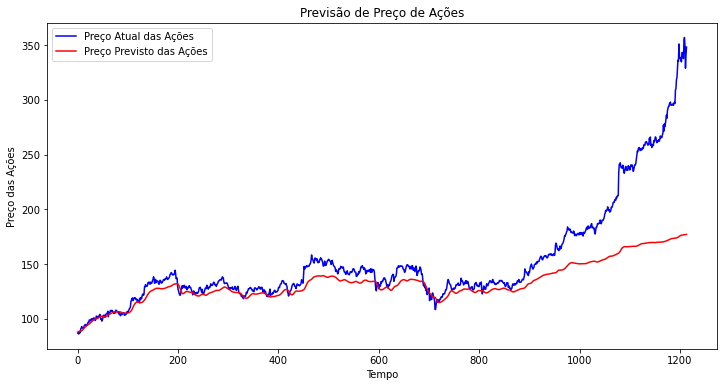

In [34]:
# plotando os dados atual e previsto
plt.plot(y_test, color='blue', label='Preço Atual das Ações')
plt.plot(predicted_price, color='red', label='Preço Previsto das Ações')
plt.title('Previsão de Preço de Ações')
plt.xlabel('Tempo')
plt.ylabel('Preço das Ações')
plt.legend()
plt.show()